<a href="https://colab.research.google.com/github/mzs0153/ELEC-7970-Reinforcement-Learning/blob/main/Policyiteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym
Gym is a toolkit for training a reinforcement learning agent provided by an artficial intelligence research organizations called Open AI.

# Creating a Gym Enviornment

Gym environment: https://gym.openai.com/envs

In this lecture, we will use "FrozenLake-v0" environment: https://gym.openai.com/envs/FrozenLake-v0/

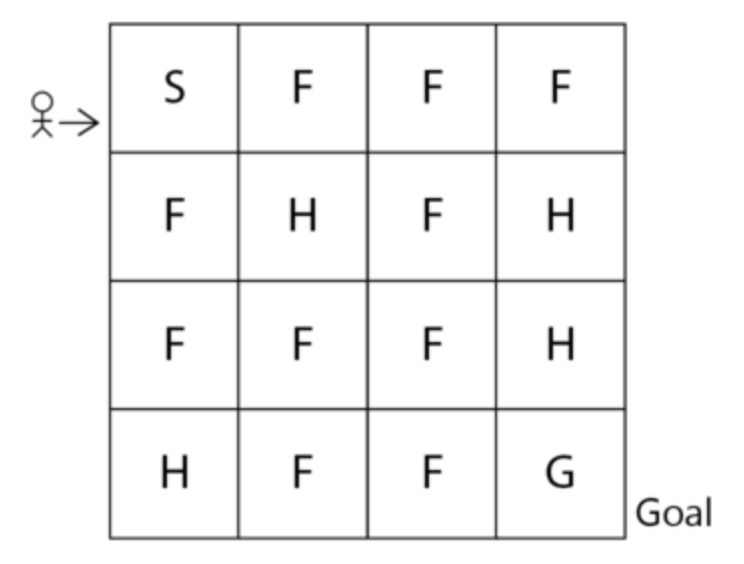




In [2]:
import gym
env=gym.make("FrozenLake-v0")
env.render()


SFFF
FHFH
FFFH
HFFG


# Exploring the environment

State and Action

In [ ]:
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


State Transition: 
4 tuple: Probability, Next State, Reward, process ends or not? 

In [3]:
s=1
a=3
print(env.P[s][a])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


# Generating an episode

In [ ]:
state=env.reset()
num_timesteps=20

for t in range(num_timesteps):
  random_action=env.action_space.sample()
  new_state, reward, done, info=env.step(random_action)

  env.render()
  if done:
    break

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


# Policy Iteration

In [5]:
import numpy as np
import gym
env=gym.make("FrozenLake-v0")

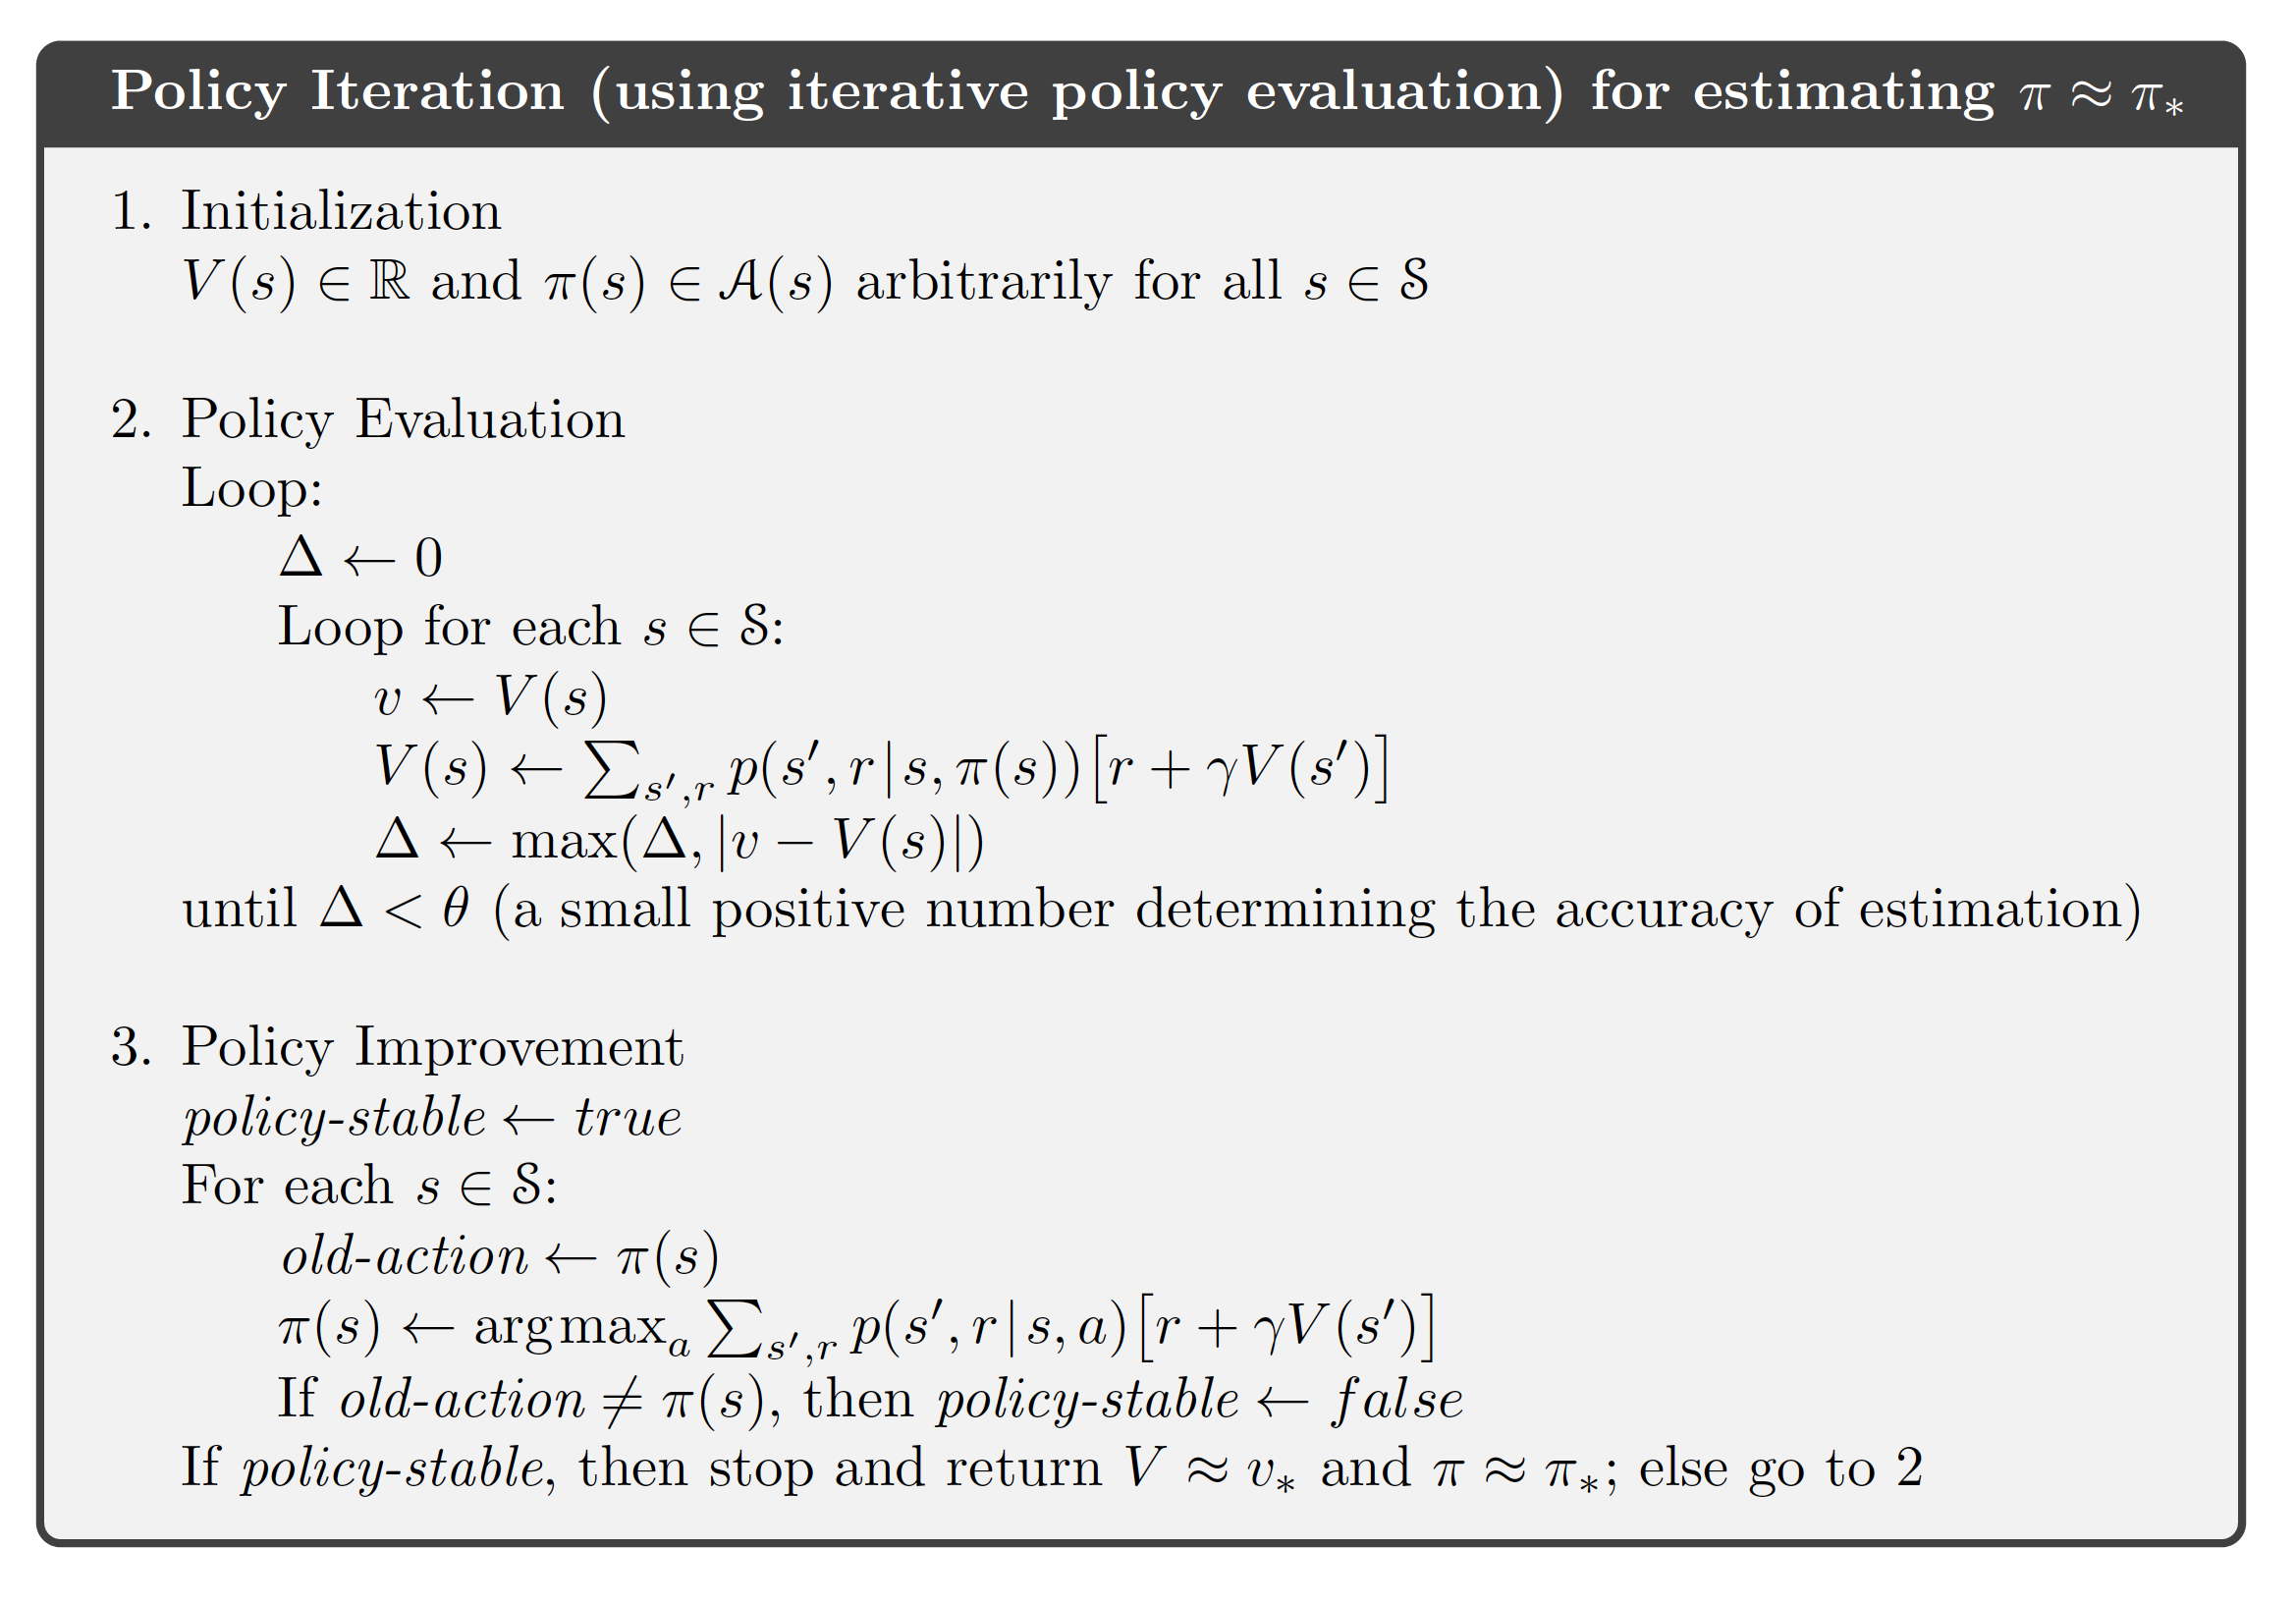

In [36]:
num_iterations=1000
threshold=1e-20
gamma=1

#Policy Initialization
policy=np.ones(env.observation_space.n) 

#Starting of the Outer loop: Objective is to find optimal policy
for i in range(num_iterations):

  #Policy Evaluation
  #compute value function 
  iter=1000
  #value function initialization
  value_table=np.zeros(env.observation_space.n)

  #Inner loop 1: Compute value function of the policy
  for i in range(iter):
    updated_value_table=np.copy(value_table)
    for s in range(env.observation_space.n):
      a=policy[s]
      value_table[s]=sum(prob*(r+gamma*updated_value_table[s_]) for prob,s_,r,_ in env.P[s][a])
    if (np.sum(np.fabs(updated_value_table-value_table))<=threshold):
       break
  #Policy Improvement
  #Extract New Policy from the Value function
  new_policy=np.zeros(env.observation_space.n)
  for s in range(env.observation_space.n):
    Q_values=[sum([prob*(r+gamma*value_table[s_]) 
                       for prob,s_,r,_ in env.P[s][a]]) 
                            for a in range(env.action_space.n)]
    new_policy[s]=np.argmax(np.array(Q_values))

  
  if (np.all(policy==new_policy)):
    break
  else:
    policy=new_policy
#Total numbers of iterations for convergence
Total_iterations=i 

In [37]:
print(policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [38]:
print(Total_iterations)

999


# Number of Iterations Vs. Discount factor



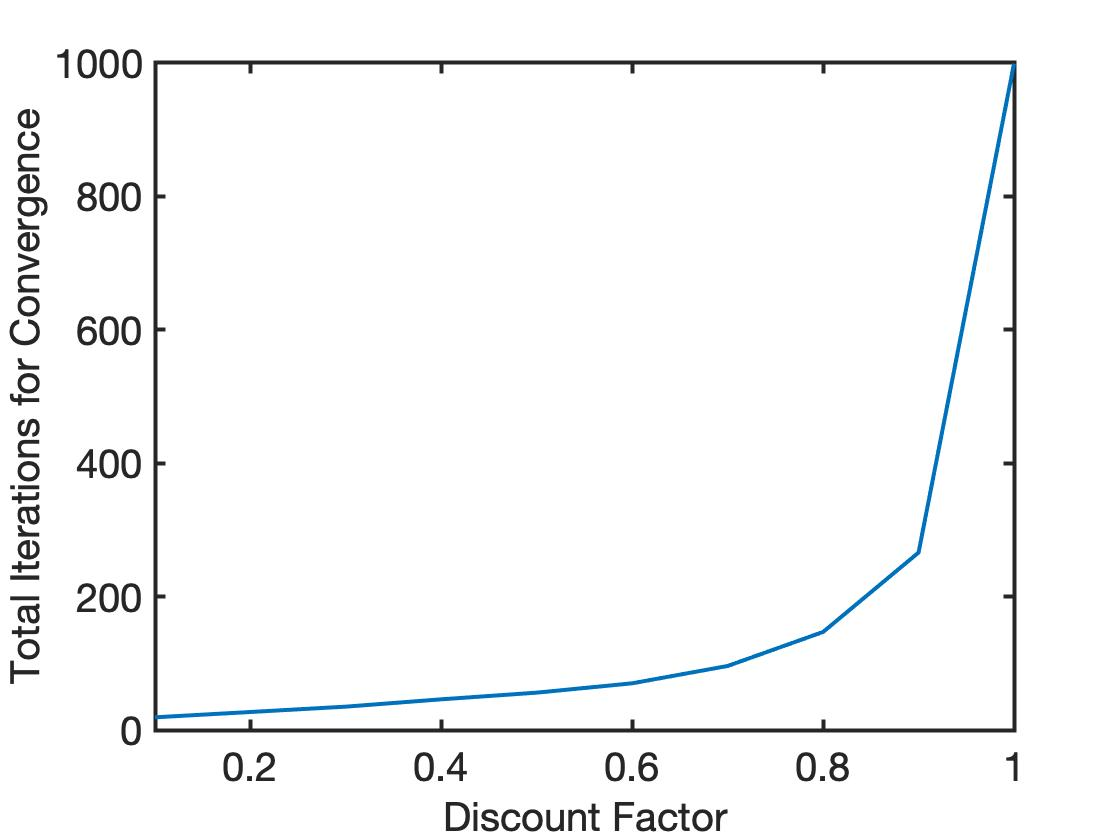

# Implementing New Policy

In [ ]:
num_timesteps=100
new_state=env.reset()
for t in range(num_timesteps):
  action=policy[new_state]
  new_state, reward, done, info=env.step(action)
  if done:
    break
Final_state=new_state
print(Final_state)

15
